In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


In [2]:
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:
import pandas as pd
import os
PATH = os.path.join("", "")

def load_temp_data(temp_path=PATH):
    csv_path = os.path.join(temp_path, "Measurement_summary.csv")
    return pd.read_csv(csv_path)

In [4]:
df = load_temp_data()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647511 entries, 0 to 647510
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Measurement date  647511 non-null  object 
 1   Station code      647511 non-null  int64  
 2   Address           647511 non-null  object 
 3   Latitude          647511 non-null  float64
 4   Longitude         647511 non-null  float64
 5   SO2               647511 non-null  float64
 6   NO2               647511 non-null  float64
 7   O3                647511 non-null  float64
 8   CO                647511 non-null  float64
 9   PM10              647511 non-null  float64
 10  PM2.5             647511 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 54.3+ MB


In [5]:
df.head()

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
0,2017-01-01 00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.059,0.002,1.2,73.0,57.0
1,2017-01-01 01:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.058,0.002,1.2,71.0,59.0
2,2017-01-01 02:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.056,0.002,1.2,70.0,59.0
3,2017-01-01 03:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.056,0.002,1.2,70.0,58.0
4,2017-01-01 04:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.003,0.051,0.002,1.2,69.0,61.0


In [6]:
# Drop duplicates
import numpy as np
import warnings

df = df.drop_duplicates()
df = df.replace(-1,np.NaN)

def pre_data(df,station):
    df_tidy = df[df['Station code']==station]
    warnings.filterwarnings("ignore")
    df_tidy.columns = df_tidy.columns.str.replace(' ', '')
    df_tidy.loc[:,'Measurementdate'] = pd.to_datetime(df_tidy.Measurementdate.astype(str))
    df_tidy.set_index('Measurementdate')
    return df_tidy

In [7]:
# Function that calculates the percentage of missing values
def calc_percent_NAs(df):
    nans = pd.DataFrame(df.isnull().sum().sort_values(ascending=False)/len(df), columns=['percent']) 
    idx = nans['percent'] > 0
    return nans[idx]
# Let's use above function to look at top ten columns with NaNs

In [8]:
def num_data(df,station):
    df_tidy = pre_data(df,station)
    drop = df_tidy.drop(['Stationcode','Address','Latitude','Longitude'], axis=1)
    print(calc_percent_NAs(df_tidy))
    return drop.set_index('Measurementdate')

In [9]:
# Standardize/scale the dataset and apply PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
# Extract the names of the numerical columns
def preprocessing(df_num):
    scaler = StandardScaler()
    pca = PCA()
    imp = SimpleImputer(missing_values=np.nan, strategy='median')
    pipeline = make_pipeline(imp, scaler, pca)
    data = pipeline.fit_transform(df_num)
    # Plot the principal components against their inertia
    features = range(pca.n_components_)
    _ = plt.figure(figsize=(15, 5))
    _ = plt.bar(features, pca.explained_variance_)
    _ = plt.xlabel('PCA feature')
    _ = plt.ylabel('Variance')
    _ = plt.xticks(features)
    _ = plt.title("Importance of the Principal Components based on inertia")
    plt.show()
    return(data)

In [10]:
df_101 = num_data(df,101)
df_101.info()


        percent
PM2.5  0.001621
PM10   0.001158
SO2    0.001081
NO2    0.001081
O3     0.001081
CO     0.001081
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 25905 entries, 2017-01-01 00:00:00 to 2019-12-31 23:00:00
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SO2     25877 non-null  float64
 1   NO2     25877 non-null  float64
 2   O3      25877 non-null  float64
 3   CO      25877 non-null  float64
 4   PM10    25875 non-null  float64
 5   PM2.5   25863 non-null  float64
dtypes: float64(6)
memory usage: 1.4 MB


In [11]:
df_101.describe()

,SO2,NO2,O3,CO,PM10,PM2.5
count,25877.000000,25877.000000,25877.000000,25877.000000,25875.000000,25863.000000
mean,0.004386,0.031631,0.024625,0.585477,38.010783,22.889185
std,0.004814,0.016605,0.019112,0.478374,27.411757,19.998326
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.003000,0.019000,0.009000,0.400000,21.000000,11.000000
50%,0.004000,0.028000,0.022000,0.500000,32.000000,18.000000
75%,0.005000,0.042000,0.035000,0.700000,48.000000,29.000000
max,0.406000,0.109000,0.325000,40.000000,516.000000,513.000000


In [12]:
def addlabel(df,num):
    df_addlabel = num_data(df,num)
    df_addlabel.fillna(np.nan)
    df_addlabel.loc[(df_addlabel['SO2'] > 0.15)  | (df_addlabel['NO2'] > 0.2)  | (df_addlabel['O3'] > 0.15)  | (df_addlabel['CO'] > 15)  | (df_addlabel['PM10'] > 150)  | (df_addlabel['PM2.5'] > 75),  'Abnormal'] = 1 
    
    df_addlabel.loc[(df_addlabel['SO2'] <= 0.15) & (df_addlabel['NO2'] <= 0.2) & (df_addlabel['O3'] <= 0.15) & (df_addlabel['CO'] <= 15) & (df_addlabel['PM10'] <= 150) & (df_addlabel['PM2.5'] <= 75), 'Abnormal'] = 0
    #df_addlabel.loc[(df_addlabel['O3'] > 0.15)  | (df_addlabel['PM10'] > 150)  | (df_addlabel['PM2.5'] > 75),  'Abnormal'] = 1 
    
    #df_addlabel.loc[(df_addlabel['O3'] <= 0.15) & (df_addlabel['PM10'] <= 150) & (df_addlabel['PM2.5'] <= 75), 'Abnormal'] = 0
    return df_addlabel

In [24]:
#print(df[df['Station code']==101])
pd.date_range("2017-01-01","2019-12-31",freq='H').difference(num_data(df,110).index)

        percent
PM2.5  0.009920
PM10   0.009612
O3     0.009419
SO2    0.009380
NO2    0.009380
CO     0.009380


DatetimeIndex(['2019-01-01 00:00:00', '2019-03-08 21:00:00',
               '2019-03-08 22:00:00', '2019-03-08 23:00:00',
               '2019-03-09 00:00:00', '2019-03-09 01:00:00',
               '2019-03-09 02:00:00', '2019-03-09 03:00:00',
               '2019-03-09 04:00:00', '2019-03-09 05:00:00',
               ...
               '2019-12-01 17:00:00', '2019-12-01 18:00:00',
               '2019-12-01 19:00:00', '2019-12-01 20:00:00',
               '2019-12-01 21:00:00', '2019-12-01 22:00:00',
               '2019-12-01 23:00:00', '2019-12-02 00:00:00',
               '2019-12-02 01:00:00', '2019-12-02 02:00:00'],
              dtype='datetime64[ns]', length=374, freq=None)

In [13]:
addlabel(df,101).describe()

        percent
PM2.5  0.001621
PM10   0.001158
SO2    0.001081
NO2    0.001081
O3     0.001081
CO     0.001081


,SO2,NO2,O3,CO,PM10,PM2.5,Abnormal
count,25877.000000,25877.000000,25877.000000,25877.000000,25875.000000,25863.000000,25862.000000
mean,0.004386,0.031631,0.024625,0.585477,38.010783,22.889185,0.022504
std,0.004814,0.016605,0.019112,0.478374,27.411757,19.998326,0.148319
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.003000,0.019000,0.009000,0.400000,21.000000,11.000000,0.000000
50%,0.004000,0.028000,0.022000,0.500000,32.000000,18.000000,0.000000
75%,0.005000,0.042000,0.035000,0.700000,48.000000,29.000000,0.000000
max,0.406000,0.109000,0.325000,40.000000,516.000000,513.000000,1.000000


In [14]:
# Calculate PCA with 2 components
def PCA_process(predata):
    dt = preprocessing(predata)
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(dt)
    principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])
    print('Ratio of PCA: ',pca.explained_variance_ratio_)
    return principalDf

        percent
PM2.5  0.001621
PM10   0.001158
SO2    0.001081
NO2    0.001081
O3     0.001081
CO     0.001081


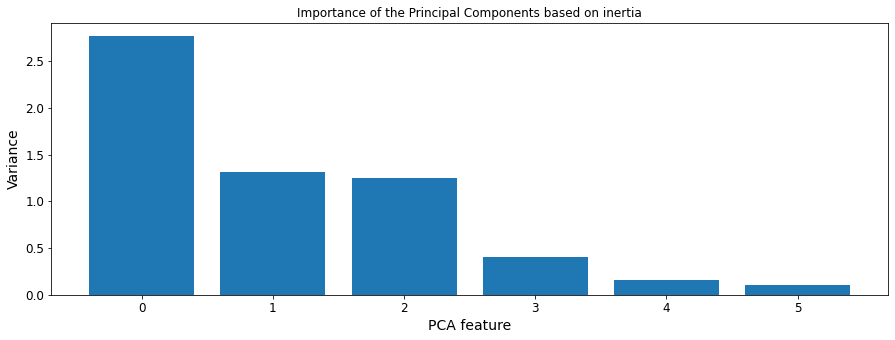

Ratio of PCA:  [0.46140143 0.21850685]


In [15]:
data_prepare = PCA_process(num_data(df,101))

In [16]:
data_prepare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25905 entries, 0 to 25904
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pc1     25905 non-null  float64
 1   pc2     25905 non-null  float64
dtypes: float64(2)
memory usage: 404.9 KB


In [17]:
from statsmodels.tsa.stattools import adfuller
# Run Augmented Dickey Fuller Test
result = adfuller(data_prepare['pc1'])
# Print p-value
print(result[1])

2.2980741742242385e-25


In [18]:
# Run Augmented Dickey Fuller Test
result2 = adfuller(data_prepare['pc2'])
# Print p-value
print(result2[1])

4.73361774110703e-28


In [19]:
#name = 'pc1' hoặc 'pc2'
def IQR_method(principalDf,name,low,high):
    # Calculate IQR for the 1st principal component (pc1)
    q1_pc1, q3_pc1 = principalDf[name].quantile([low, high])
    iqr_pc1 = q3_pc1 - q1_pc1
    print(iqr_pc1)
    # Calculate upper and lower bounds for outlier for pc1
    lower_pc1 = q1_pc1 - (1.5*iqr_pc1)
    print(lower_pc1)
    upper_pc1 = q3_pc1 + (1.5*iqr_pc1)
    print(upper_pc1)
    name_col = 'anomaly_'+name+'_iqr'
    # Filter out the outliers from the pc1
    principalDf[name_col] = ((principalDf[name]>upper_pc1) | (principalDf[name]<lower_pc1)).astype('int')
    return principalDf

In [20]:
def IQR_df(data):
    data_iqr = IQR_method(data,'pc1',0.1,0.9)
    data_iqr = IQR_method(data_iqr,'pc2',0.1,0.9)
    return data_iqr

In [21]:
def concatdata(original,data_detect):
    original.reset_index(drop=False, inplace=True)
    data_detect.reset_index(drop=True, inplace=True)
    dff = pd.concat([original, data_detect], axis=1) 

    return dff.set_index('Measurementdate')

In [22]:
def plot_iqr(original,process_dt,abnormal_col,para):
    data = concatdata(original,process_dt)
    # Let's plot the outliers from pc1 on top of the sensor_11 and see where they occured in the time series
    a = data[data[abnormal_col] == 1] #anomaly
    b = data[data['Abnormal'] == 1] #anomaly
    _ = plt.figure(figsize=(18,6))
    _ = plt.plot(data[para], color='blue', label='Normal')
    _ = plt.plot(a[para], linestyle='none', marker='X', color='red', markersize=12, label='Anomaly')
    _ = plt.plot(b[para], linestyle='none', marker='+', color='green', markersize=8, label='Anomaly Correct')

    _ = plt.xlabel('Date and Time')
    _ = plt.ylabel('Sensor Reading')
    _ = plt.title('IQR Anomalies Detection')
    _ = plt.legend(loc='best')
    plt.show();

3.3196954136094057
-6.487825440059388
6.790956214378235
1.8247280550083398
-3.704174938057648
3.5947372819757115
        percent
PM2.5  0.001621
PM10   0.001158
SO2    0.001081
NO2    0.001081
O3     0.001081
CO     0.001081


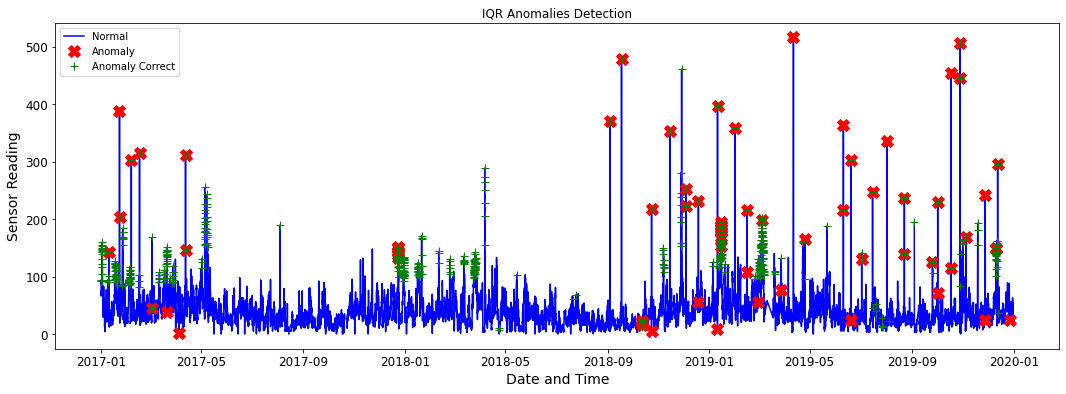

In [23]:
data_iqr = IQR_df(data_prepare)
#plot_iqr(num_data(df,101),data_iqr,'anomaly_pc1_iqr','PM10')
plot_iqr(addlabel(df,101),data_iqr,'anomaly_pc1_iqr','PM10')

In [24]:
# Import necessary libraries
from sklearn.cluster import KMeans
# I will start k-means clustering with k=2 as I already know that there are 3 classes of "NORMAL" vs 
# "NOT NORMAL" which are combination of BROKEN" and"RECOVERING"
# Write a function that calculates distance between each point and the centroid of the closest cluster
def getDistanceByPoint(data, model):
    """ Function that calculates the distance between a point and centroid of a cluster, 
    returns the distances in pandas series"""
    distance = []
    for i in range(0,len(data)):
        Xa = np.array(data.loc[i])
        Xb = model.cluster_centers_[model.labels_[i]-1]
        distance.append(np.linalg.norm(Xa-Xb))
    return pd.Series(distance, index=data.index)
def kmean_method(principalDf,cluster,outliers_fraction):
    kmeans = KMeans(n_clusters=cluster, random_state=42)
    kmeans.fit(principalDf.values)
    labels = kmeans.predict(principalDf.values)
    unique_elements, counts_elements = np.unique(labels, return_counts=True)
    clusters = np.asarray((unique_elements, counts_elements))
 
    # Assume that ...% of the entire data set are anomalies 
    # outliers_fraction = 0.02
    # get the distance between each point and its nearest centroid. The biggest distances are considered as anomaly
    distance = getDistanceByPoint(principalDf, kmeans)
    # number of observations that equate to the 13% of the entire data set
    number_of_outliers = int(outliers_fraction*len(distance))
    # Take the minimum of the largest 13% of the distances as the threshold
    threshold = distance.nlargest(number_of_outliers).min()
    # anomaly1 contain the anomaly result of the above method Cluster (0:normal, 1:anomaly) 
    name_col = 'anomaly1'
    principalDf[name_col] = (distance >= threshold).astype(int)
    return principalDf, name_col

In [25]:
def plot_kmeans(original,process_dt,cluster,outliers_fraction,para):
    k_pro, abnormal_col = kmean_method(process_dt,cluster,outliers_fraction)
    data = concatdata(original,k_pro)
    # Let's plot the outliers from pc1 on top of the sensor_11 and see where they occured in the time series
    a = data[data[abnormal_col] == 1] #anomaly
    aa = a[abnormal_col].sum()
    b = data[data['Abnormal'] == 1] #anomaly
    bb = b['Abnormal'].sum()
    c = data[(data['Abnormal'] == 1) & (data[abnormal_col] == 1)]
    cc = c['Abnormal'].sum()
    acc = cc/bb
    print(aa,bb,cc)
    name_fig = para
    figsize=(18,4)
    fig, ax = plt.subplots()
    data.plot(y=name_fig,use_index=True,figsize=figsize,title=name_fig,ax=ax)
    a.plot(y=name_fig,use_index=True,style='ro',figsize=figsize,title=name_fig,ax=ax)
    b.plot(y=name_fig,use_index=True,style='g+',figsize=figsize,title=name_fig,ax=ax)
    ax.legend(['Normal','Abnormal','True Abnormal'])
    plt.show()
    return data,acc

In [26]:
df_101.head()

,SO2,NO2,O3,CO,PM10,PM2.5
Measurementdate,,,,,,
2017-01-01 00:00:00,0.004,0.059,0.002,1.2,73.0,57.0
2017-01-01 01:00:00,0.004,0.058,0.002,1.2,71.0,59.0
2017-01-01 02:00:00,0.004,0.056,0.002,1.2,70.0,59.0
2017-01-01 03:00:00,0.004,0.056,0.002,1.2,70.0,58.0
2017-01-01 04:00:00,0.003,0.051,0.002,1.2,69.0,61.0


        percent
PM2.5  0.001621
PM10   0.001158
SO2    0.001081
NO2    0.001081
O3     0.001081
CO     0.001081
580 582.0 374.0


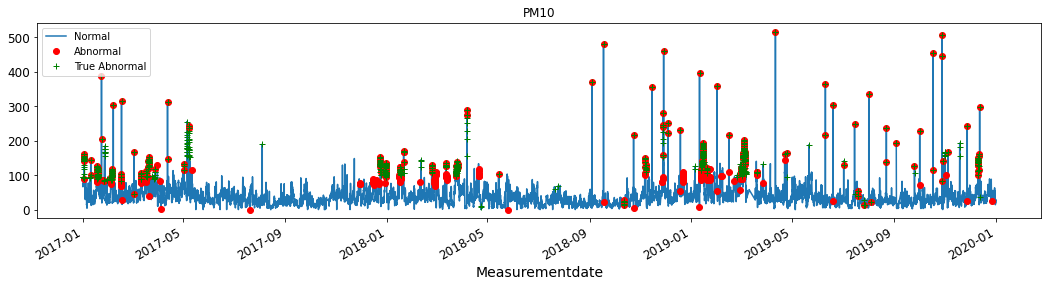

0.6426116838487973


In [27]:
k_cluster = 2
outliers_fraction = 0.022427
kmeans_result = kmean_method(data_prepare,k_cluster,outliers_fraction)
_,acc = plot_kmeans(addlabel(df,101),data_prepare,k_cluster,outliers_fraction,'PM10')
print(acc)

In [28]:
# Import IsolationForest
from sklearn.ensemble import IsolationForest
# Assume that 13% of the entire data set are anomalies
def IsoForest_method(principalDf,outliers_fraction):
    model =  IsolationForest(contamination=outliers_fraction)
    model.fit(principalDf.values)
    name_col = 'anomaly2'
    principalDf[name_col] = pd.Series(model.predict(principalDf.values))
    # visualization
    #df_101['anomaly2'] = pd.Series(principalDf['anomaly2'].values, index=df_101.index)

    return principalDf,name_col

In [29]:
def plot_IsoForest(original,process_dt,outliers_fraction,para):
    I_pro, abnormal_col = IsoForest_method(process_dt,outliers_fraction)
    data = concatdata(original,I_pro)
    # Let's plot the outliers from pc1 on top of the sensor_11 and see where they occured in the time series
    a = data[data[abnormal_col] == -1] #anomaly
    aa = a[abnormal_col].sum()
    b = data[data['Abnormal'] == 1] #anomaly
    bb = b['Abnormal'].sum()
    c = data[(data['Abnormal'] == 1) & (data[abnormal_col] == -1)]
    cc = c['Abnormal'].sum()
    acc = cc/bb
    ddd = aa/bb
    print(aa,bb,cc,acc)
    name_fig = para
    figsize=(18,4)
    fig, ax = plt.subplots()
    data.plot(y=name_fig,use_index=True,figsize=figsize,title=name_fig,ax=ax)
    a.plot(y=name_fig,use_index=True,style='ro',figsize=figsize,title=name_fig,ax=ax)
    b.plot(y=name_fig,use_index=True,style='g+',figsize=figsize,title=name_fig,ax=ax)

    ax.legend(['Normal','Abnormal','Rolling Std'])
    plt.show()
    

        percent
PM2.5  0.001621
PM10   0.001158
SO2    0.001081
NO2    0.001081
O3     0.001081
CO     0.001081
-581 582.0 374.0 0.6426116838487973


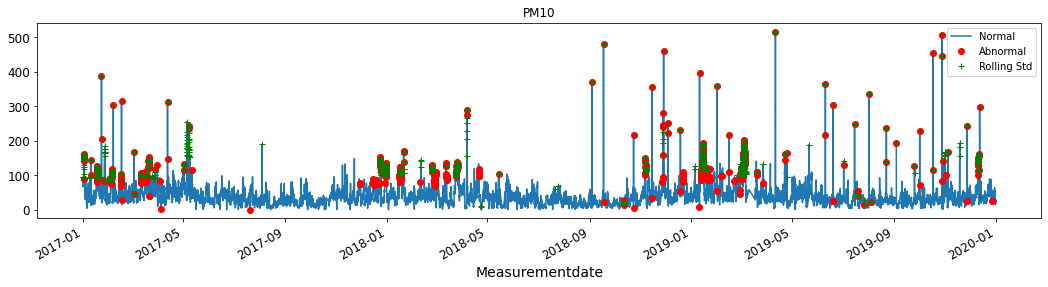

In [30]:
outliers_fraction = 0.022427
IsoForest_result = IsoForest_method(data_prepare,outliers_fraction)

plot_IsoForest(addlabel(df,101),data_prepare,outliers_fraction,'PM10')

In [31]:
from sklearn.cluster import KMeans

k_range = range(2, 10, 1)
kmeans_per_k = []
for k in k_range:
    print("k={}".format(k))
    kmeans = KMeans(n_clusters=k, random_state=42).fit(data_prepare.values)
    kmeans_per_k.append(kmeans)

k=2
k=3
k=4
k=5
k=6
k=7
k=8
k=9


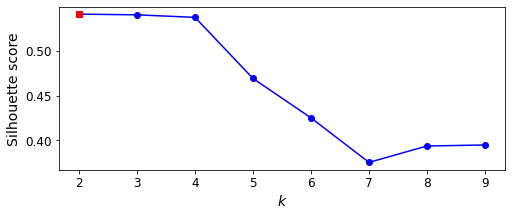

In [32]:
from sklearn.metrics import silhouette_score

silhouette_scores = [silhouette_score(data_prepare.values, model.labels_)
                     for model in kmeans_per_k]
best_index = np.argmax(silhouette_scores)
best_k = k_range[best_index]
best_score = silhouette_scores[best_index]

plt.figure(figsize=(8, 3))
plt.plot(k_range, silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.plot(best_k, best_score, "rs")
plt.show()

In [33]:
best_k

2

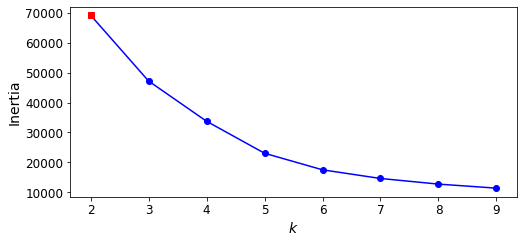

In [34]:
inertias = [model.inertia_ for model in kmeans_per_k]
best_inertia = inertias[best_index]

plt.figure(figsize=(8, 3.5))
plt.plot(k_range, inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.plot(best_k, best_inertia, "rs")
plt.show()

In [35]:
best_model = kmeans_per_k[0]

In [36]:
def plot_ds(data,color_cl):
    names=data.columns
    # Plot time series for each sensor with BROKEN state marked with X in red color
    for name in names:
        figsize=(18,4)
        data.plot(y=name,use_index=True,figsize=figsize,title=name,color=color_cl)
        plt.show()

In [37]:
def cluster_divide(model,data):
    colors = ['blue','red','green','m']
    y = []
    

    for cluster_id in np.unique(model.labels_):
        print("Cluster", cluster_id)
        in_cluster = model.labels_==cluster_id
        datacluster = data[in_cluster]
        datacluster['Cluster'] = cluster_id
        plot_ds(datacluster,colors[cluster_id])
        y.append(datacluster)
  #  alldata = 
    return pd.concat(y)

In [38]:
def prepare_Kmean_Evaluate(original,process_dt,cluster,outliers_fraction):
    k_pro, abnormal_col = kmean_method(process_dt,cluster,outliers_fraction)
    data = concatdata(original,k_pro)
    return data

In [39]:
df_101.head()

,SO2,NO2,O3,CO,PM10,PM2.5
Measurementdate,,,,,,
2017-01-01 00:00:00,0.004,0.059,0.002,1.2,73.0,57.0
2017-01-01 01:00:00,0.004,0.058,0.002,1.2,71.0,59.0
2017-01-01 02:00:00,0.004,0.056,0.002,1.2,70.0,59.0
2017-01-01 03:00:00,0.004,0.056,0.002,1.2,70.0,58.0
2017-01-01 04:00:00,0.003,0.051,0.002,1.2,69.0,61.0


        percent
PM2.5  0.001621
PM10   0.001158
SO2    0.001081
NO2    0.001081
O3     0.001081
CO     0.001081
Cluster 0


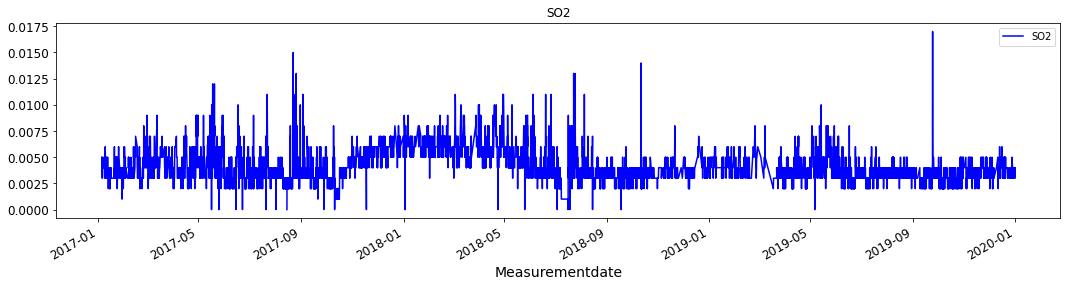

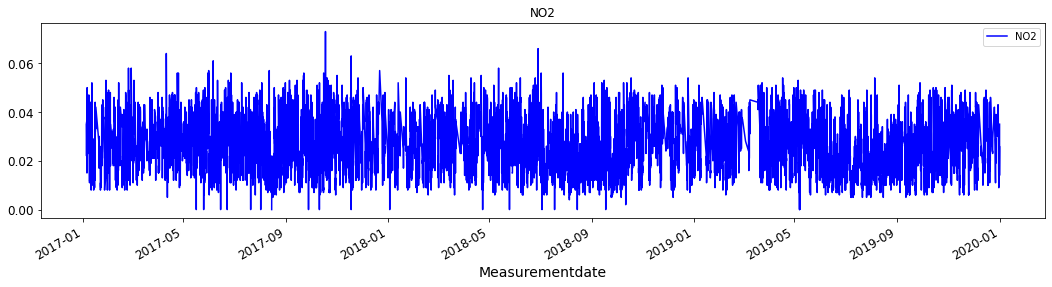

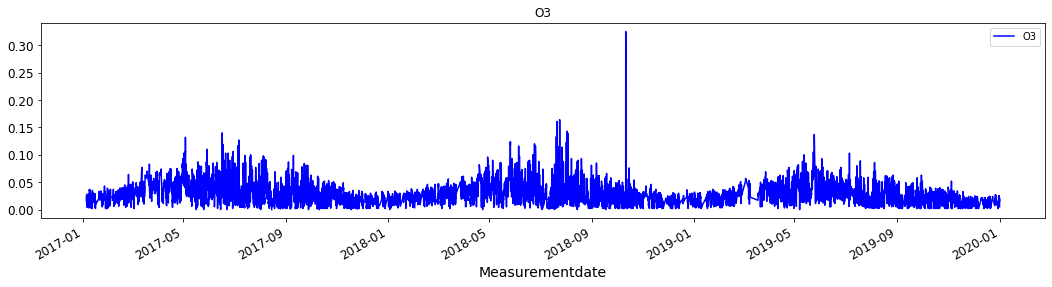

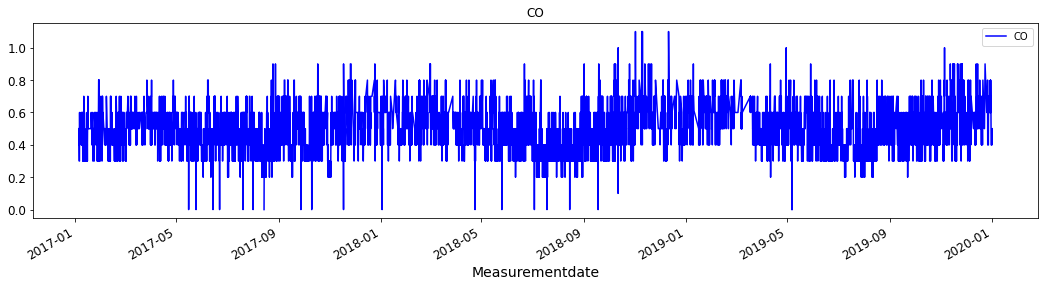

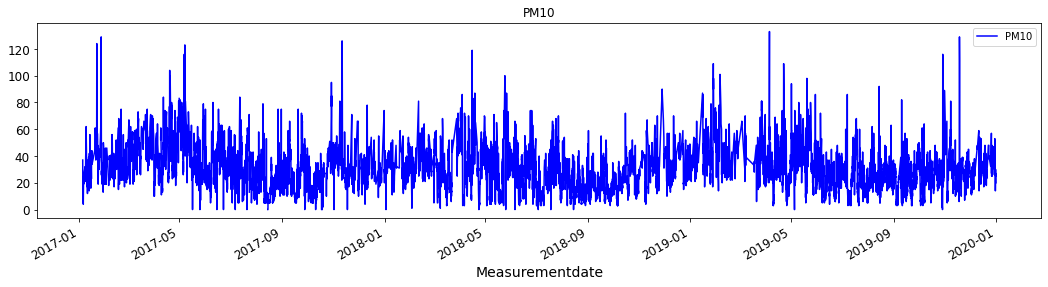

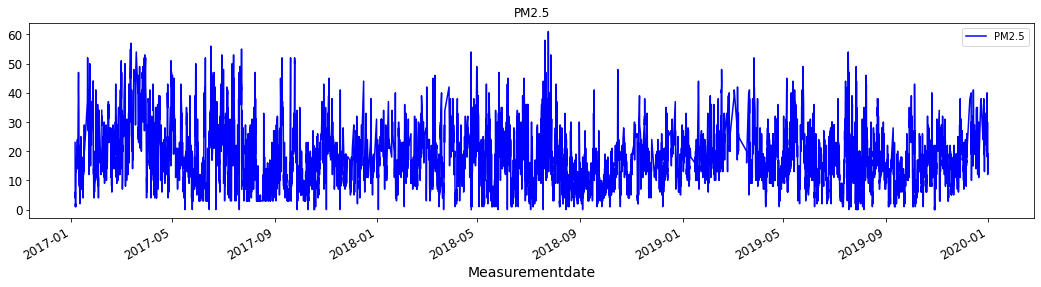

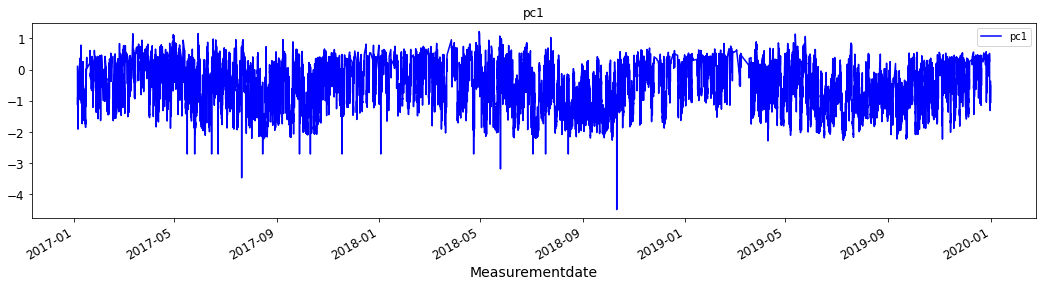

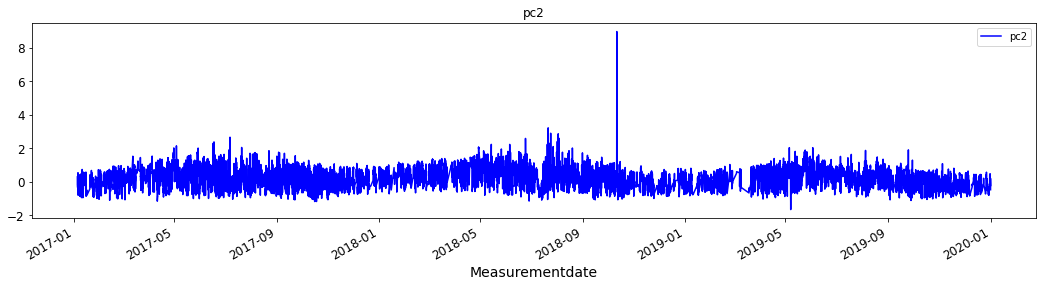

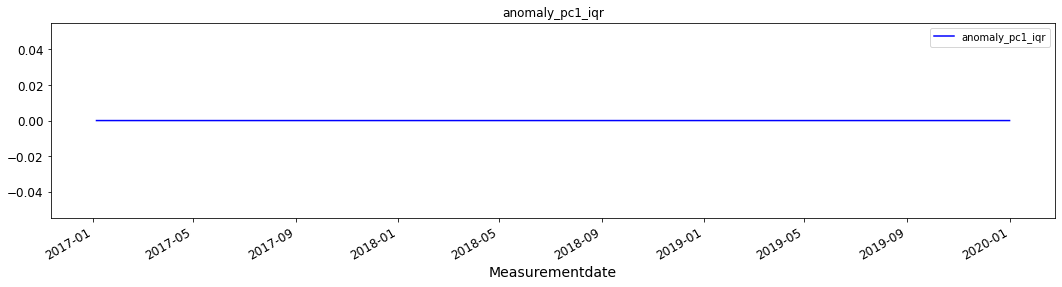

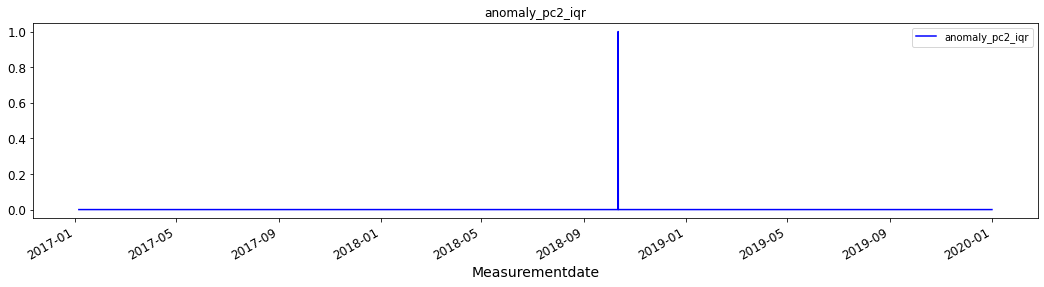

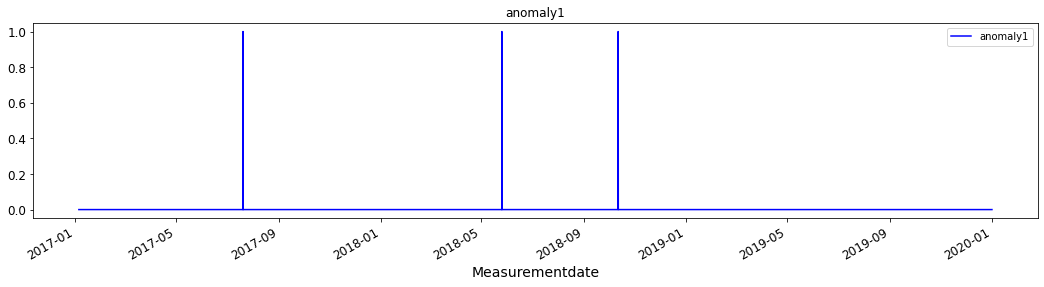

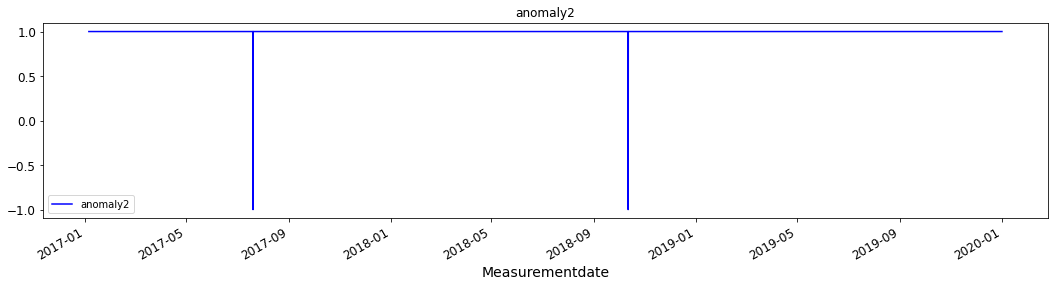

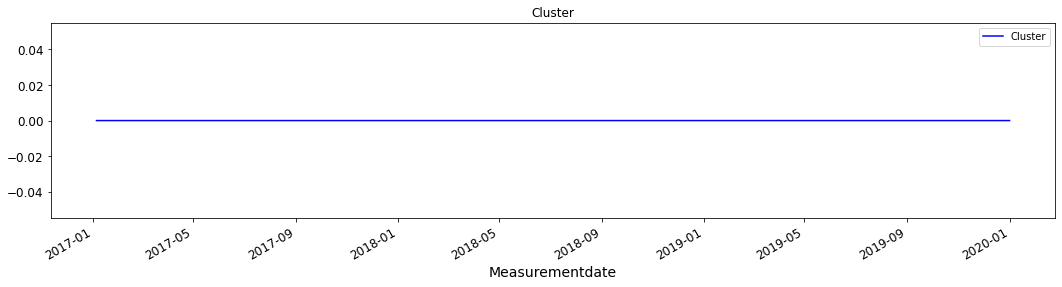

Cluster 1


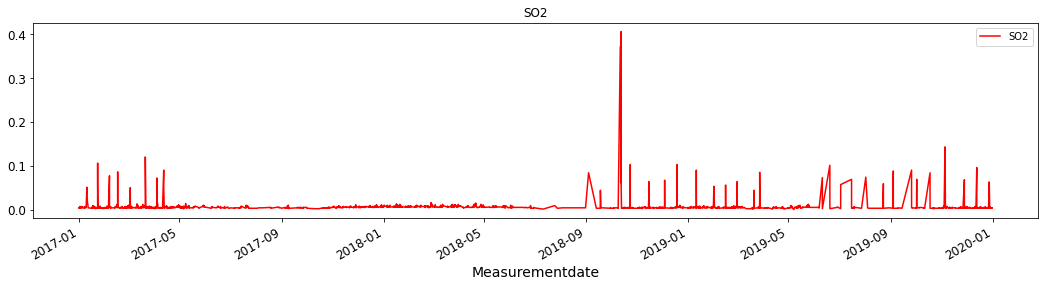

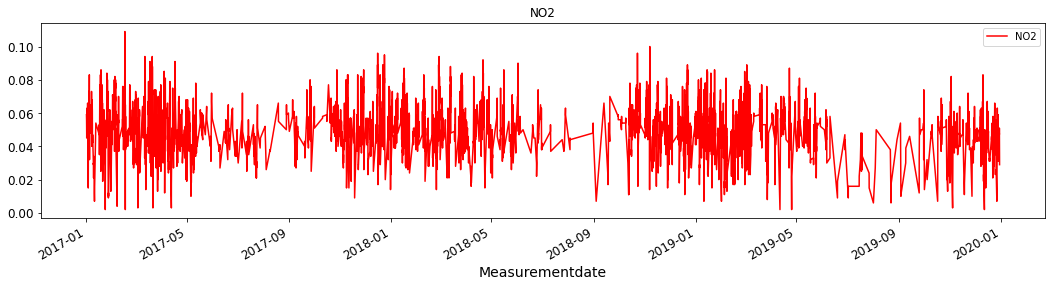

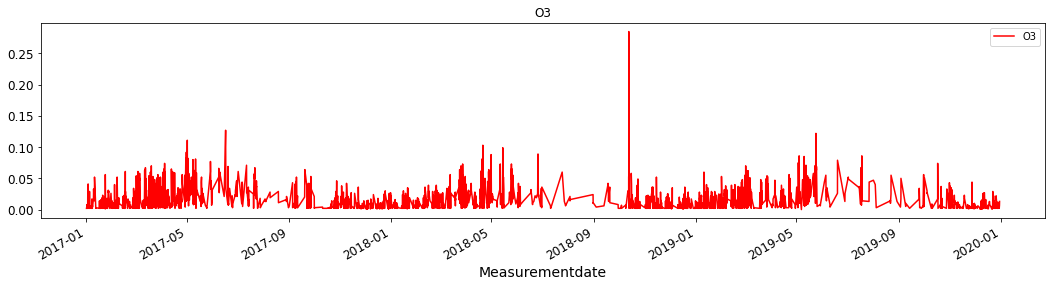

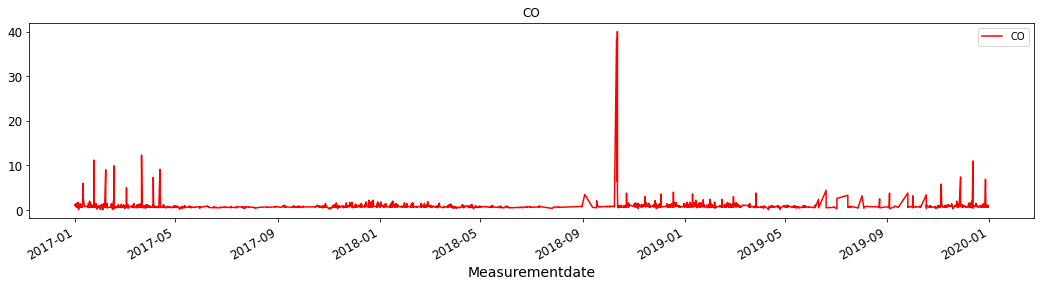

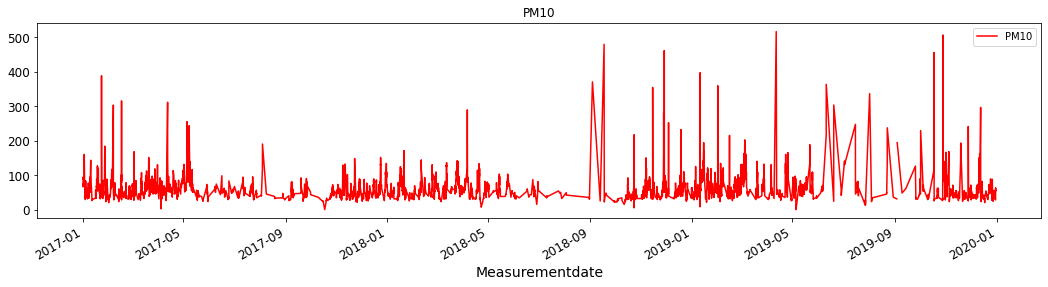

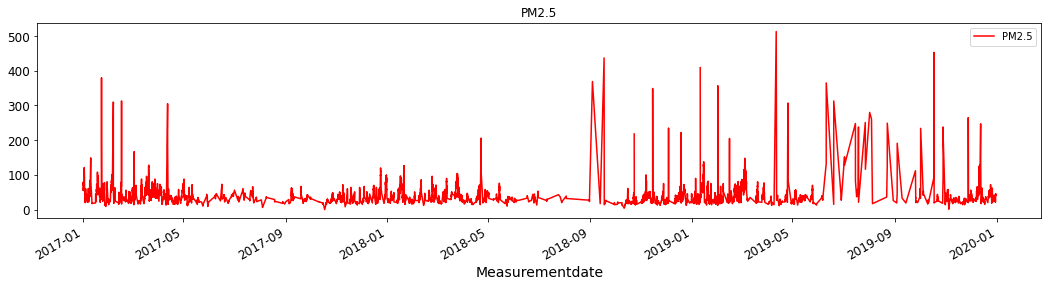

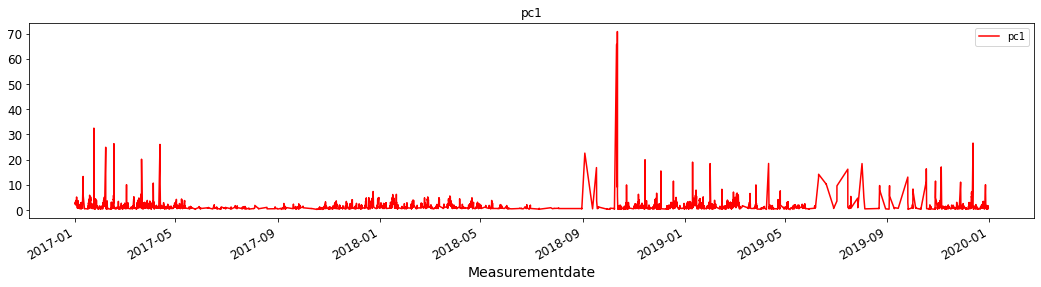

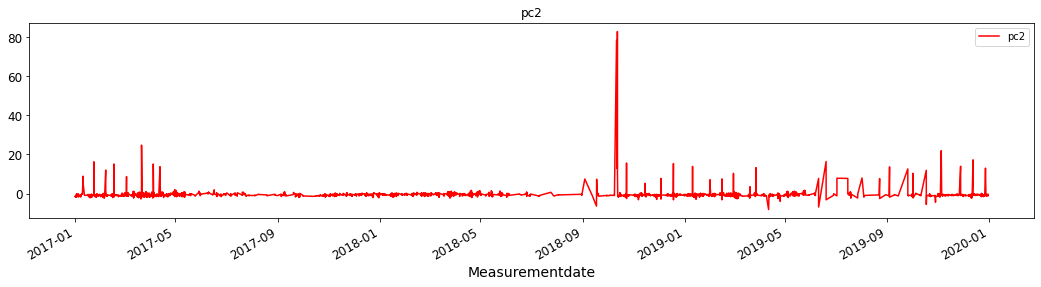

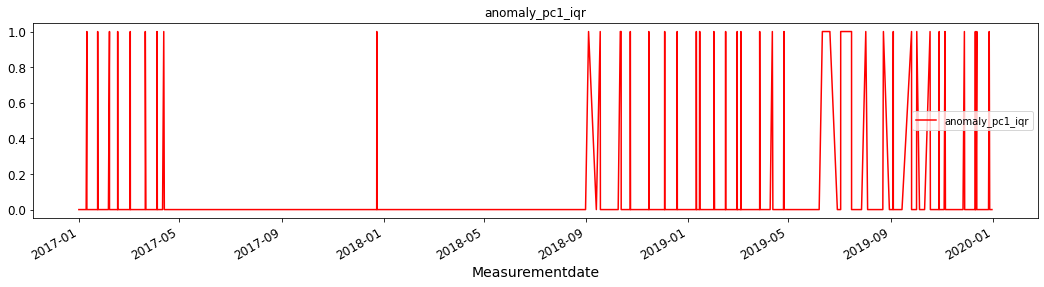

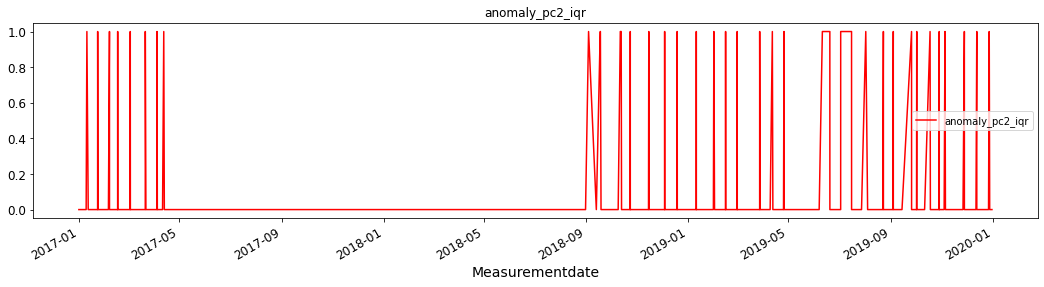

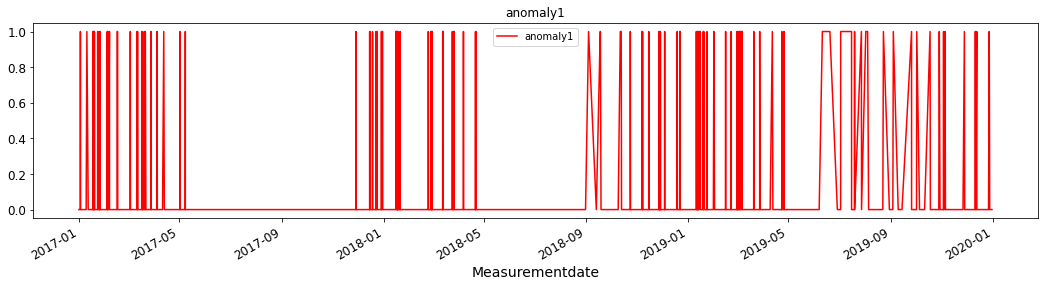

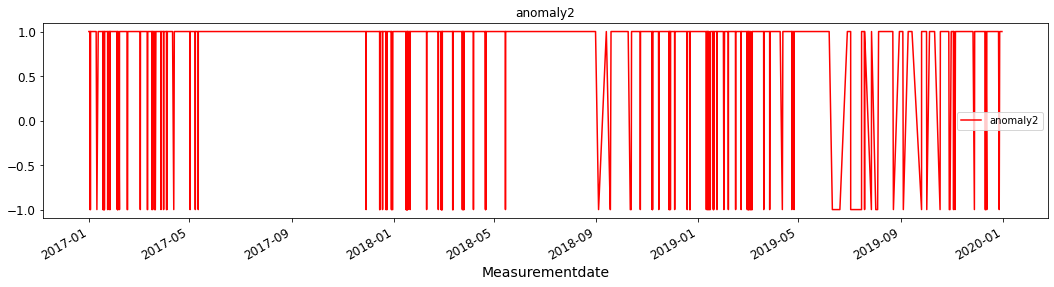

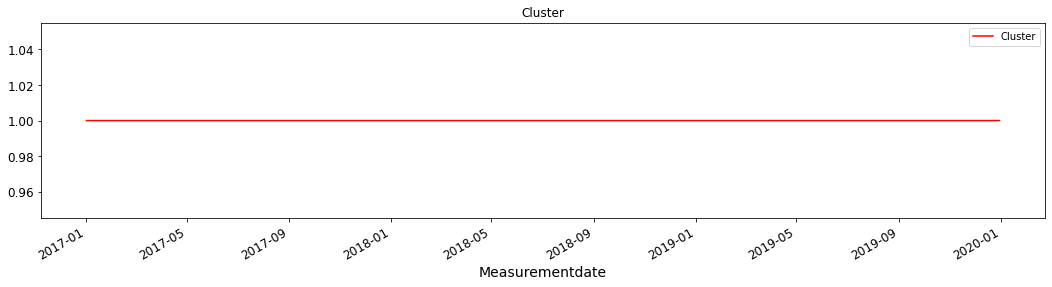

In [40]:
kmeans_result = prepare_Kmean_Evaluate(num_data(df,101),data_prepare,2,0.02)
alldata = cluster_divide(best_model,kmeans_result)

In [41]:
alldata.head()

,SO2,NO2,O3,CO,PM10,PM2.5,pc1,pc2,anomaly_pc1_iqr,anomaly_pc2_iqr,anomaly1,anomaly2,Cluster
Measurementdate,,,,,,,,,,,,,
2017-01-05 12:00:00,0.005,0.035,0.015,0.5,37.0,23.0,0.103994,-0.299125,0,0,0,1,0
2017-01-05 13:00:00,0.005,0.027,0.022,0.4,19.0,11.0,-0.836843,0.229201,0,0,0,1,0
2017-01-05 14:00:00,0.004,0.022,0.025,0.4,22.0,6.0,-1.129106,0.329246,0,0,0,1,0
2017-01-05 15:00:00,0.004,0.027,0.022,0.4,14.0,6.0,-1.119323,0.178298,0,0,0,1,0
2017-01-05 16:00:00,0.004,0.031,0.019,0.4,16.0,4.0,-1.013098,0.006170,0,0,0,1,0


In [42]:
data_prepare.head()

,pc1,pc2,anomaly_pc1_iqr,anomaly_pc2_iqr,anomaly1,anomaly2
0,2.836545,-1.370447,0,0,0,1
1,2.826400,-1.348975,0,0,0,1
2,2.760739,-1.289108,0,0,0,1
3,2.736733,-1.279912,0,0,0,1
4,2.591896,-1.297740,0,0,0,1


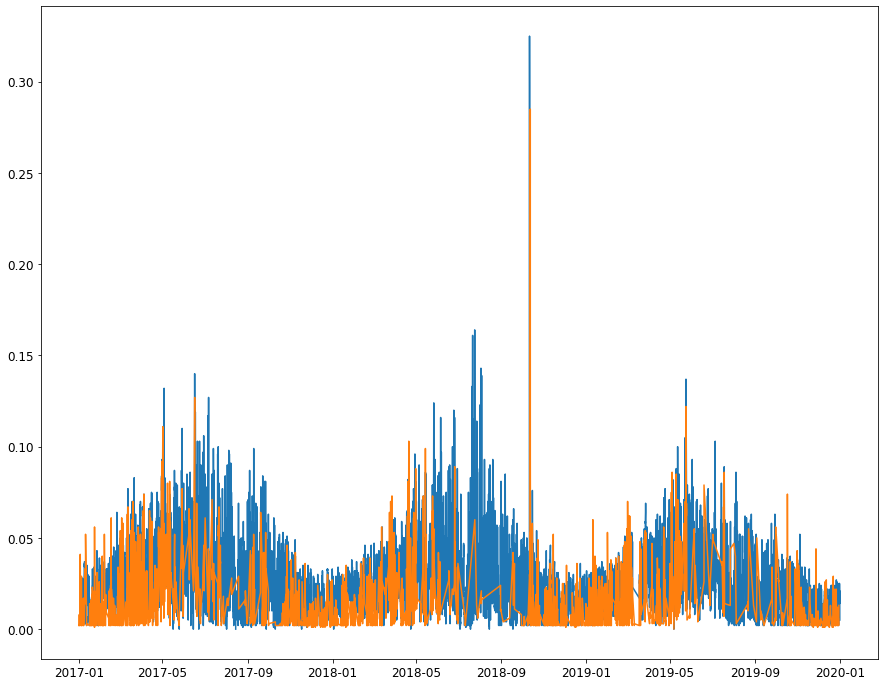

In [43]:
groups = alldata.groupby("Cluster")
plt.figure(figsize=(15,12))
for name, group in groups:
    plt.plot(group["O3"], marker="", linestyle="-", label=name)


<AxesSubplot:title={'center':'1'}, xlabel='Measurementdate'>

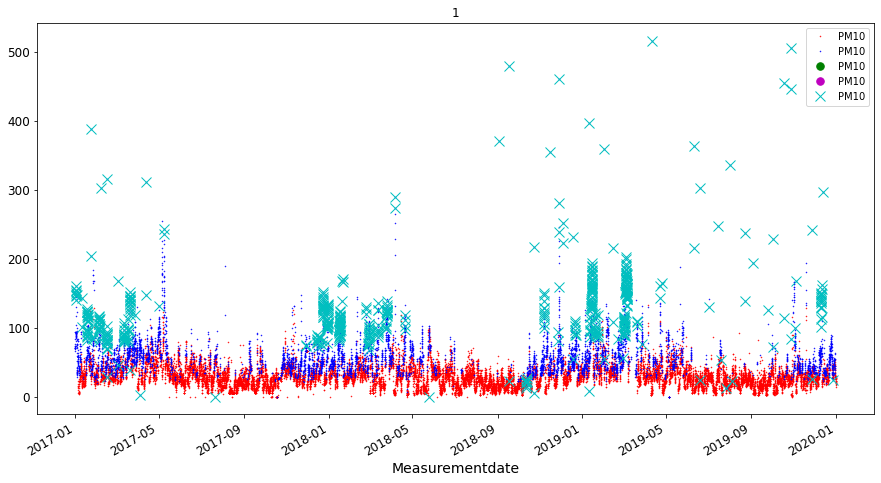

In [44]:
fig1, ax1 = plt.subplots()
name_fig='PM10'
figsize = (15,8)
c0 = alldata[alldata['Cluster'] == 0]
c1 = alldata[alldata['Cluster'] == 1]
c2 = alldata[alldata['Cluster'] == 2]
c3 = alldata[alldata['Cluster'] == 3]
d = alldata[alldata['anomaly1'] == 1]
c0.plot(y=name_fig,use_index=True,style='r.',figsize=figsize,title=name,ax=ax1,markersize=1)
c1.plot(y=name_fig,use_index=True,style='b.',figsize=figsize,title=name,ax=ax1,markersize=1)
c2.plot(y=name_fig,use_index=True,style='g.',figsize=figsize,title=name,ax=ax1,markersize=15)
c3.plot(y=name_fig,use_index=True,style='m.',figsize=figsize,title=name,ax=ax1,markersize=15)

d.plot(y=name_fig,use_index=True,style='cx',figsize=figsize,title=name,ax=ax1,markersize=10)


In [ ]:
k_cluster = 2
outliers_fraction = 0.02
df_102 = num_data(df,103)
data_prepare2 = PCA_process(num_data(df,103))
kmeans_result = kmean_method(data_prepare2,k_cluster,outliers_fraction)
plot_kmeans(num_data(df,103),data_prepare2,k_cluster,outliers_fraction,'PM10')